In [1]:
#Loads modules
import torch as t
import matplotlib.pyplot as plt

import os

import sys
dir_path = os.path.dirname(os.getcwd())
sys.path.append(os.path.join(dir_path,'scripts'))

import json

import importlib
import Systems as Systems
import Plotting as Plotting
import Training as Training
import Controls as Controls
import Evolvers as Evolvers

In [2]:
experiment = "Flensmon2D_0"

In [65]:
#Loads the params_dict for the experiment
exp_path = os.path.join(dir_path,"Experiments",experiment)

params_filepath = os.path.join(exp_path,"Parameters.json")
with open(params_filepath) as json_file:
    params_dict = json.load(json_file)

params_dict.update({"exp_path":exp_path})

Loaded UE0s


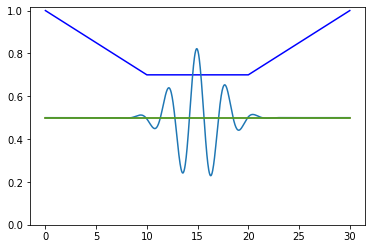

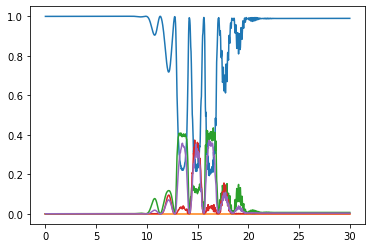

In [66]:
importlib.reload(Systems)
importlib.reload(Plotting)
importlib.reload(Training)
importlib.reload(Controls)
importlib.reload(Evolvers)

class Flensmon_1D(t.nn.Module, Systems.Periodic_System, Controls.CauchyPulse, Evolvers.ETrotter, Training.Trainer, Plotting.Plotter):
    def __init__(self,params_dict):
        super().__init__()
        self.params_dict = params_dict
        super(t.nn.Module,self).__init__()
        return
    
    def forward(self):
        H = self.get_H(self.activation_func(self.times),self.get_control())
        self.latest_matrix_exp = t.matrix_exp(-1j*H*self.dt)
        # self.latest_matrix_exp = self.basis_change@t.matrix_exp(-1j*H*self.dt)
        return t.linalg.multi_dot(list(mat for mat in self.latest_matrix_exp.flip(0)))

    def V(self, alphas, control):
        return self.EJ*(-self.cos_mat.repeat((alphas.shape[0],1,1)) \
                            + alphas.view(-1,1,1)/2*self.cos2_mat \
                            + control.view(-1,1,1)*self.q_mat)

obj = Flensmon_1D(params_dict)
# obj.plot_potential()
obj.plot_activation_func()
obj.plot_occupancy(indices=[0,1,2,4])

In [63]:
obj.minimize(0.1,100)

initial loss: 0.728382408618927


KeyboardInterrupt: 

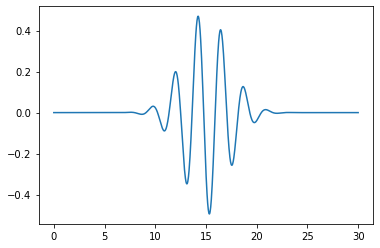

In [36]:
plt.plot(obj.times,0.5*t.exp(-(obj.times - obj.T/2)**2/10)*t.sin(2.7646*obj.times))

In [61]:
obj.stored_losses

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.0030, 0.0030, 0.0027, 0.0030, 0.0029, 0.0028, 0.0029, 0.0029, 0.0028,
         0.0029, 0.0030, 0.0034, 0.0032, 0.0035, 0.0031, 0.0036, 0.0032]])

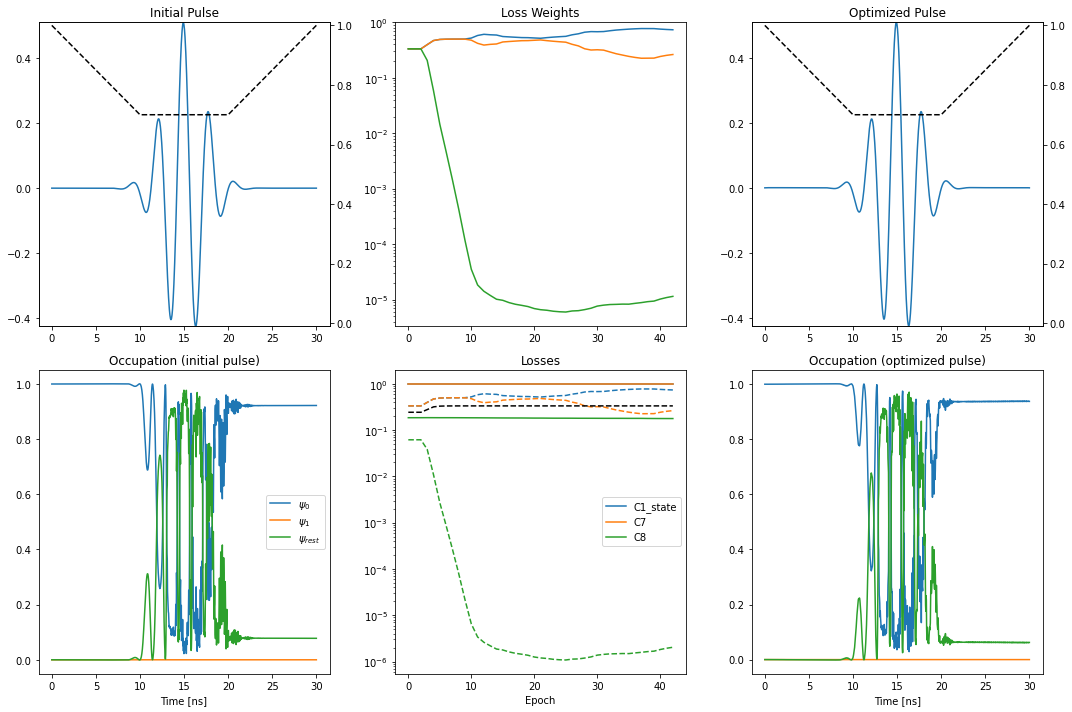

In [64]:
obj.plot_run()